# EDA

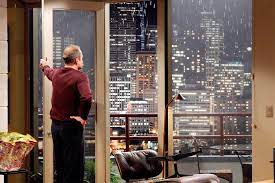

## Import packages and load data

In [1]:
# packages
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# data
df = pd.read_csv('data/King_County_House_prices_dataset.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


### examine and preprocess data

In [3]:
# extract number of houses and number of house attributes (i.e. columns)
print(f'The dataset contains information about {df.shape[0]} houses and {df.shape[1]} columns')

The dataset contains information about 21597 houses and 21 columns


In [4]:
# get information about datatypes and missing values per column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
# perform descriptive statistics on numeric columns to get an idea about the distribution pattern of the data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.000,4580474287.771,2876735715.748,1000102.000,2123049175.000,3904930410.000,7308900490.000,9900000190.000
price,21597.000,540296.574,367368.140,78000.000,322000.000,450000.000,645000.000,7700000.000
bedrooms,21597.000,3.373,0.926,1.000,3.000,3.000,4.000,33.000
bathrooms,21597.000,2.116,0.769,0.500,1.750,2.250,2.500,8.000
sqft_living,21597.000,2080.322,918.106,370.000,1430.000,1910.000,2550.000,13540.000
sqft_lot,21597.000,15099.409,41412.637,520.000,5040.000,7618.000,10685.000,1651359.000
floors,21597.000,1.494,0.540,1.000,1.000,1.500,2.000,3.500
waterfront,19221.000,0.008,0.087,0.000,0.000,0.000,0.000,1.000
view,21534.000,0.234,0.766,0.000,0.000,0.000,0.000,4.000
condition,21597.000,3.410,0.651,1.000,3.000,3.000,4.000,5.000


In [6]:
# extract the number of unique values per column to get an idea about the range of values
df.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [7]:
df.waterfront.value_counts()

0.000    19075
1.000      146
Name: waterfront, dtype: int64

In [8]:
# check for duplicated rows
df.duplicated().value_counts()

False    21597
dtype: int64

1) Missings

As can be seen from the table above ('Non-Null Count'), most columns don't have missing values, with a few exceptions - specifically 'waterfront', 'views' and 'yr_renovated'. We not to choose a strategy on how to handle these missing values in case the affected columns become relevant for our exploratory analyses.

2) Datatypes

The datatypes associated with the different columns seem to mostly correct. Only the date, which is currently a string datatype, needs to be converted into a datetime object. Additionally, several numeric variables, e.g. price, bathrooms, floors, etc. are currently of type float but can be casted into int since they don´t contain floating point numbers (number of bedrooms is always of int type). Moreover, the 'waterfront' column only contains two distinct values, 0 and 1, with the majority of houses having a value = 0. Thus, this column is probably rather a category variable.

3) Duplicates

There are no housing entries occurring several times. Thus, the dataset doesn´t to be cleaned for duplicates.

### clean data

In [9]:
# cast date column to datetime object
df.date = pd.to_datetime(df.date)
print(df.dtypes[0:2])
df[['id', 'date']].head()

id               int64
date    datetime64[ns]
dtype: object


,id,date
0,7129300520,2014-10-13
1,6414100192,2014-12-09
2,5631500400,2015-02-25
3,2487200875,2014-12-09
4,1954400510,2015-02-18


In [10]:
# replace NaNs in waterfront with 'missing' and convert to type category
#df.waterfront.fillna('missing', inplace=True)
df.waterfront = df.waterfront.astype('category')

In [11]:
# extract float types
float_columns = df.dtypes[df.dtypes == 'float64'].index
float_columns

Index(['price', 'bathrooms', 'floors', 'view', 'yr_renovated', 'lat', 'long'], dtype='object')

In [12]:
# drop latitude and longitude
float_columns = float_columns[:-2]
float_columns

Index(['price', 'bathrooms', 'floors', 'view', 'yr_renovated'], dtype='object')

In [13]:
# first replace NaN with -999 in view and yr_renovated, otherwise, columns cannot be casted to int type
df.view.fillna(-999, inplace=True)
df.yr_renovated.fillna(-999, inplace=True)

In [14]:
# cast float to type int for selected columns
df[float_columns] = df[float_columns].astype('int64')
df.dtypes

id                        int64
date             datetime64[ns]
price                     int64
bedrooms                  int64
bathrooms                 int64
sqft_living               int64
sqft_lot                  int64
floors                    int64
waterfront             category
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement            object
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## Exploratory data analysis

### Availability of houses with waterfront view is low

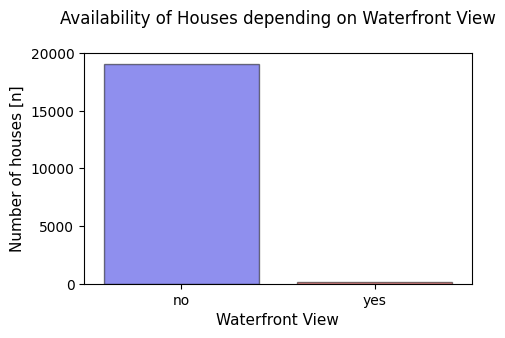

Additionally, information on waterfront view is missing for 2376 houses


In [23]:
plt.figure(figsize=(5,3))

sns.countplot(data=df, x='waterfront', alpha=0.5, edgecolor='black',
        palette={0:'blue', 1: 'red'})
plt.ylabel('Number of houses [n]', fontsize=11)
plt.xlabel('Waterfront View', fontsize=11)
plt.xticks(ticks=np.arange(0, 2), labels=['no', 'yes'])
plt.title('Availability of Houses depending on Waterfront View\n')

plt.show()

print('Additionally, information on waterfront view is missing for', 
        df.waterfront.isna().sum(), 'houses')

The stakeholder prefers to buy a house with waterfront view. However, the figure above shows that houses with waterfront view are considerably less available compared to houses without. This limits the range of flexibility when deciding for a house.

In addition, it should be noted that information on waterfront view is missing for a total of 2.376 houses.

### Houses with waterfront view are considerably more expensive

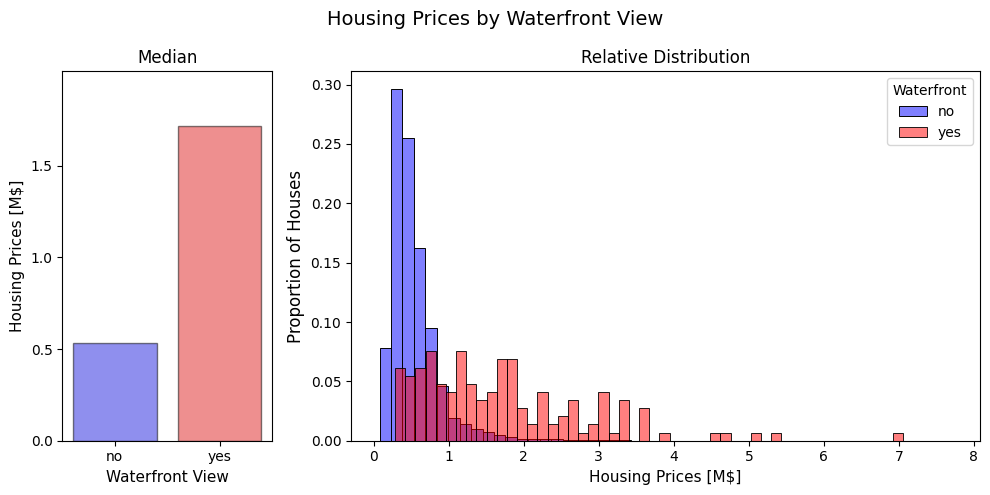

In [26]:
# initialize figure
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5), gridspec_kw={'width_ratios': [1, 3]})
fig.suptitle('Housing Prices by Waterfront View', fontsize=14)
# median housing price
fig1 = sns.barplot(data=df, x='waterfront', y='price', alpha=0.5, edgecolor='black',
        errwidth=0, palette={0:'blue', 1: 'red'}, ax=ax1)
ax1.set_ylabel('Housing Prices [M$]', fontsize=11)
ax1.set_yticks(ticks=np.arange(0, 2000000, 500000), labels=np.arange(0, 2, 0.5))
ax1.set_xlabel('Waterfront View', fontsize=11)
ax1.set_xticks(ticks=np.arange(0, 2), labels=['no', 'yes'])
ax1.set_title('Median')
# relative distribution of housing prices
fig2 = sns.histplot(data=df[df.waterfront==0], x='price', bins=50, stat='probability',
        color='blue', alpha=0.5, label='no', ax=ax2)
fig3 = sns.histplot(data=df[df.waterfront==1], x='price', bins=50, stat='probability',
        color='red', alpha=0.5, label='yes', ax=ax2)
ax2.set_xlabel('Housing Prices [M$]', fontsize=11)
ax2.set_xticks(ticks=np.arange(0, 9000000, 1000000), labels=np.arange(0, 9))
ax2.set_ylabel('Proportion of Houses', fontsize=12)
ax2.legend(title='Waterfront')
ax2.set_title('Relative Distribution', fontsize=12)
plt.tight_layout()
plt.show()

The stakeholder only has a limited budget. However, the figure above shows that the median price is considerably higher for houses with waterfront compared to those without. Additionally, distribution of prices for houses wih waterfront is strongly shifted to the Mio Dollar range. Given his limited budget, the stakeholer should maybe reconsider his preferences.

### Effects of bedroom and bathroom number on prices for houses with waterfront view

In [49]:
# filter houses with waterfront
df_waterfront = df[df.waterfront==1]
df_waterfront.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
49,822039084,2015-03-11,1350000,3,2,2753,65005,1,1.000,2,...,9,2165,588.0,1953,0,98070,47.404,-122.451,2680,72513
230,8096000060,2015-04-13,655000,2,1,1450,15798,2,1.000,4,...,7,1230,220.0,1915,1978,98166,47.450,-122.375,2030,13193
246,2025069065,2014-09-29,2400000,4,2,3650,8354,1,1.000,4,...,9,1830,1820.0,2000,0,98074,47.634,-122.072,3120,18841
264,2123039032,2014-10-27,369900,1,0,760,10079,1,1.000,4,...,5,760,0.0,1936,0,98070,47.468,-122.438,1230,14267
300,3225069065,2014-06-24,3080000,4,5,4550,18641,1,1.000,4,...,10,2600,1950.0,2002,0,98074,47.605,-122.077,4550,19508


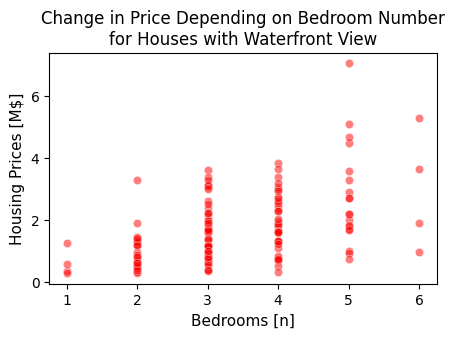

In [64]:
plt.figure(figsize=(5, 3))

sns.scatterplot(data=df_waterfront, x='bedrooms', y='price', color='red', alpha=0.5)
plt.ylabel('Housing Prices [M$]', fontsize=11)
plt.yticks(ticks=np.arange(0, 8000000, 2000000), labels=np.arange(0, 8, 2))
plt.xlabel('Bedrooms [n]', fontsize=11)
plt.title('Change in Price Depending on Bedroom Number\nfor Houses with Waterfront View')

plt.show()


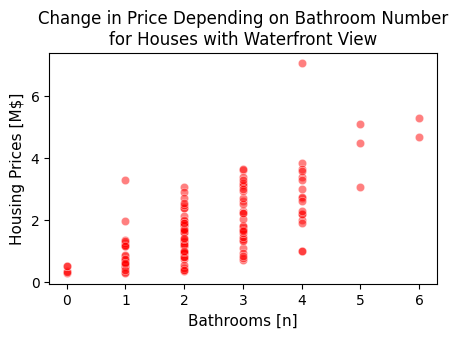

In [65]:
plt.figure(figsize=(5, 3))

sns.scatterplot(data=df_waterfront, x='bathrooms', y='price', color='red', alpha=0.5)
plt.ylabel('Housing Prices [M$]', fontsize=11)
plt.yticks(ticks=np.arange(0, 8000000, 2000000), labels=np.arange(0, 8, 2))
plt.xlabel('Bathrooms [n]', fontsize=11)
plt.title('Change in Price Depending on Bathroom Number\nfor Houses with Waterfront View')

plt.show()

As can be seen from the figures above, the price for houses with waterfront views shows a near-linear increase with increasing number of bedrooms and increasing number of bathrooms

### Geospatial locations of houses with and without waterfront views

In [40]:
mean_latiude = df.lat.mean()
mean_longitude = df.long.mean()

In [59]:
# using px.scatter_geo
# generate figure with information to be displayed 
#fig1 = px.scatter_geo(data_frame=df_waterfront, lat='lat', lon='long',
#        center=dict(lat=mean_latiude, lon=mean_longitude),
#        hover_name='id')
# update markers
#fig1.update_traces(marker=dict(size=5, opacity=0.5, color=dict(0: 'blue', 1:'red')
#                                line=dict(width=1, color='black')),
#                selector=dict(mode='markers'))

# update layout
#fig1.update_geos(
#    visible=False, resolution=110, scope='usa',
#    showcountries=True, countrycolor="Black",
#    showsubunits=True, subunitcolor="Blue"
#)

#fig1.update_layout(height=200, margin={"r":0,"t":0,"l":0,"b":0})

#fig1.show()

In [89]:
# using px.scatter_geo from plotly.express
geo_fig = px.scatter_geo(data_frame=df_waterfront, lat='lat', lon='long', scope='usa',
            color='price', center=dict(lat=mean_latiude, lon=mean_longitude),
            hover_name='id', fitbounds='locations',
            title='Spatial Locations of Houses with Waterfront View')

geo_fig.update_traces(marker=dict(size=10, opacity=0.5,
                                line=dict(width=1, color='black')),
                selector=dict(mode='markers'))

geo_fig.show()